![maf](../../images/maf.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1, '../')
from flow_manager import *
from flow_catlog import * 
from utl import *
from load_data import *
from sampler import *

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [2]:
DTYPE=tf.float32
NP_DTYPE=np.float32
num_bijectors = 6
n_epochs = 1000
batch_size=None
lr = 1e-3

In [3]:
X_data = load_moon_dataset()
input_dims = X_data.shape[1]

(-2.0, 2.0)

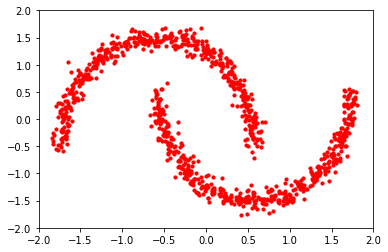

In [4]:
xlim, ylim = [-2, 2], [-2, 2]
plt.scatter(X_data[:, 0], X_data[:, 1], s=10, color='red')
plt.xlim(xlim)
plt.ylim(ylim)

In [5]:
base_dist = tfd.MultivariateNormalDiag(loc=tf.zeros([2], tf.float32), scale_diag=tf.ones([2], tf.float32))

2021-09-02 16:24:43.432224: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-02 16:24:43.432277: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kangz1): /proc/driver/nvidia/version does not exist
2021-09-02 16:24:43.435561: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
activation = tf.nn.relu
# flow = MAF(base_dist, num_bijectors, hidden_units=[256, 256], activation=activation)
# plot_contour_prob([flow], scale_fig=6, title=[activation])

model = MAF(base_dist, num_bijectors, hidden_units=[16, 16], ndims=input_dims)

In [7]:
# Make samples
names, samples = make_samples(base_dist, model.flow)

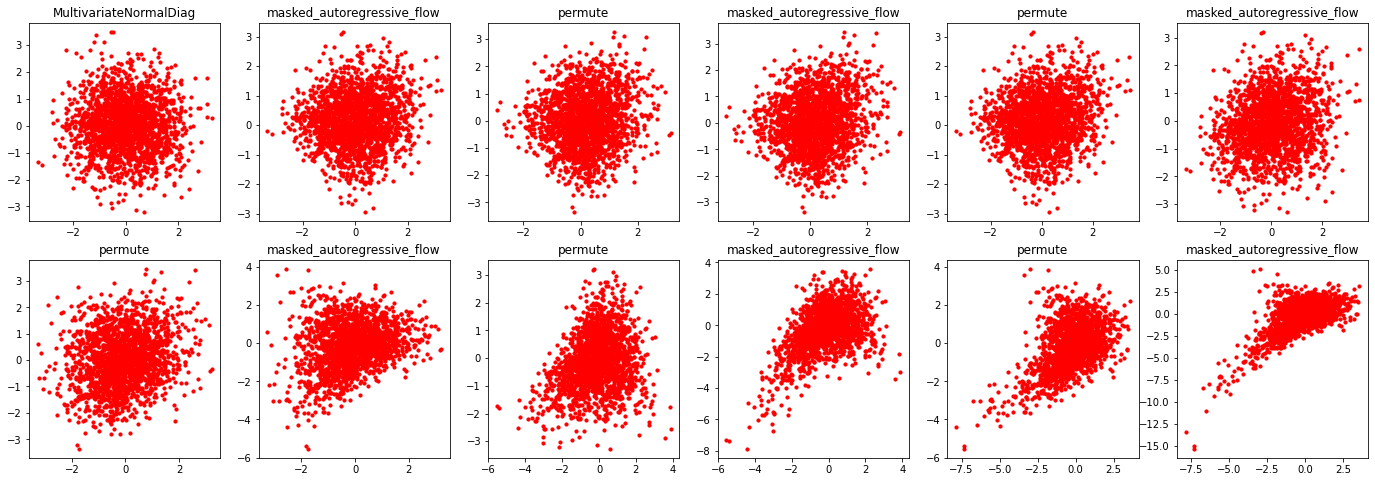

In [8]:
plot_samples(samples, names, rows=2)

# Training a MAF Bijector

In [9]:
# history = train_dist_routine_(X_data, maf, n_epochs=n_epochs, n_disp=int(n_epochs/50))
# plot_loss(history)

In [10]:
# losses = train_dist_routine(X_data, flow, learning_rate=1e-3, steps=1000)
# plt.plot(losses)

_ = model(X_data)
print(model.summary())
model.compile(optimizer=tf.optimizers.Adam(lr), loss=lambda _, log_prob: -log_prob)
history = model.fit(x=X_data, batch_size=None, epochs=n_epochs)

Model: "maf"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2,330
Trainable params: 2,328
Non-trainable params: 2
_________________________________________________________________
None
Epoch 1/1000


2021-09-02 16:24:53.446268: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2021-09-02 16:24:53.521965: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


32/32 [==============================] - 4s 4ms/step - loss: 2.8704
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.5870
Epoch 3/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.4802
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 2.4098
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 2.3532
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 2.2920
Epoch 7/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.2429
Epoch 8/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.2185
Epoch 9/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.2197
Epoch 10/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.1802
Epoch 11/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.1807
Epoch 12/1000
32/32 [==============================] - 0s 4ms/step - loss: 2.0966
Epoch 13/1000
32/32 [=================

In [11]:
# Make samples
names, samples = make_samples(base_dist, model.flow)

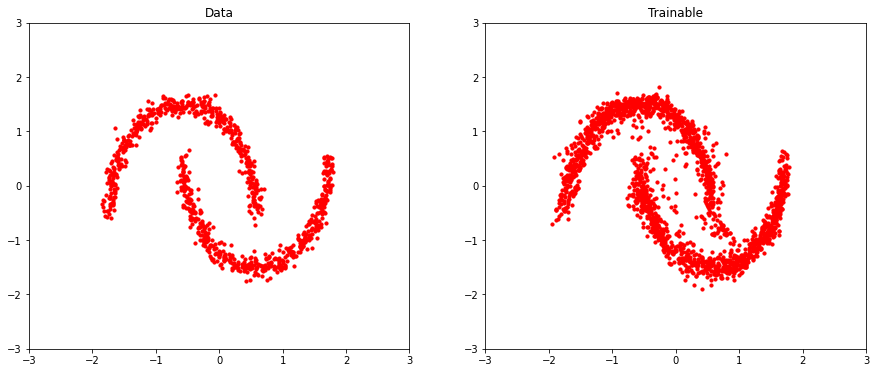

In [12]:
visualize_training_data(X_data, samples)

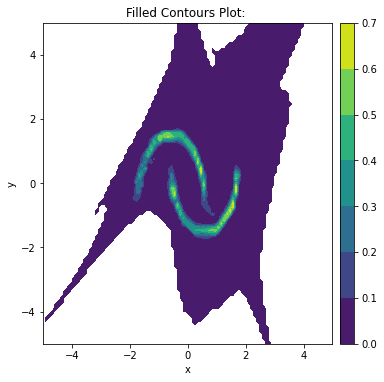

In [13]:
plot_contour_prob([model.flow], scale_fig=6)